In [3]:
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


# Overview

### Here I multiplied the conduction terms (both in perp and parallel) by a number. The cases are without AFN and have all BCs. They were not tuned for Nsep.

# Hermes IO

In [2]:
casestore = dict()

In [4]:
   
db = CaseDB()
toload = [
    dict(name="base", id = "d19-noafn_all"),
    dict(name="cond_x0.9", id = "d19ac-cond_x0.9"),
    dict(name="cond_x0.5", id = "d19ab-cond_x0.5"),
    dict(name="cond_x0.1", id = "d19ad-cond_x0.1"),
]
casestore = {}
for case in toload:
    casestore[case["name"]] = db.load_case_2D(case["id"], use_squash = True, verbose = True)

- Looking for squash file
- Squash file found. squash date 09/25/2023, 15:31:08, dmp file date 09/18/2023, 11:16:19
CHECK: Total domain volume is 1.942E+00 [m3]
- Looking for squash file
- Squashoutput file not found, creating...
- Done
CHECK: Total domain volume is 1.942E+00 [m3]
- Looking for squash file
- Squashoutput file not found, creating...
- Done
CHECK: Total domain volume is 1.942E+00 [m3]
- Looking for squash file
- Squashoutput file not found, creating...
- Done
CHECK: Total domain volume is 1.942E+00 [m3]


In [5]:
plt.close("all")
%matplotlib inline

## Read Hermes data

In [6]:
hr = dict()
for hermes_case in casestore.keys(): 
    print(hermes_case)
    hr[hermes_case] = Hermesdata()
    hr[hermes_case].read_case(casestore[hermes_case].ds.isel(t=-1, x = slice(2,-2)))

base
cond_x0.9
cond_x0.5
cond_x0.1


# Read SOLEDGE CSV data

In [7]:
soledgecases = {
    "tightwall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_1e19"), # Hermes-3 like wall
    "tightwall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"), # Hermes-3 like wall
    "widewall_2e19_5m" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19_5M"),
    "tightwall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_3e19"), # Hermes-3 like wall
    "widewall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_1e19"), 
    "widewall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19"), 
    "widewall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_3e19"), 
}

sl = dict()

for name in soledgecases:
    path = soledgecases[name]
    sl[name] = SOLEDGEdata(path = path)
    sl[name].read_csv(os.path.join(path, "omp_plasma.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "omp_neutrals.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "imp_plasma.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "imp_neutrals.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")



c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astyp

## Read SOLPS

In [8]:
solpscases = {
    "base" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5"),
    "noiz_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"),
    "gammai_2.5" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00"),
    "dpuff_1e22" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22"),
    "dpuff_5e21" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=5.0E+21"),
    "no_fast_reflec" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"),
    "nsep_2e19" : os.path.join(onedrive_path,r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=2E+19"),
    "nsep_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=3E+19"),
    "narrow_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent"),
    "no_visc" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent.b2tqca_phm0=0"),
    "16x_mc" : os.path.join(onedrive_path, r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.xxx.BCCON=16.core_extent.MC.histories.x16-ish.NOT.converged"),
}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    sp[name].read_last10s(solpscases[name])

c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\co

In [9]:
for name in casestore:

    ds = casestore[name].ds
    ds = calculate_radial_fluxes(ds)



In [10]:
hr.keys()

dict_keys(['base', 'cond_x0.9', 'cond_x0.5', 'cond_x0.1'])

In [15]:
sl.keys()

dict_keys(['tightwall_1e19', 'tightwall_2e19', 'widewall_2e19_5m', 'tightwall_3e19', 'widewall_1e19', 'widewall_2e19', 'widewall_3e19'])

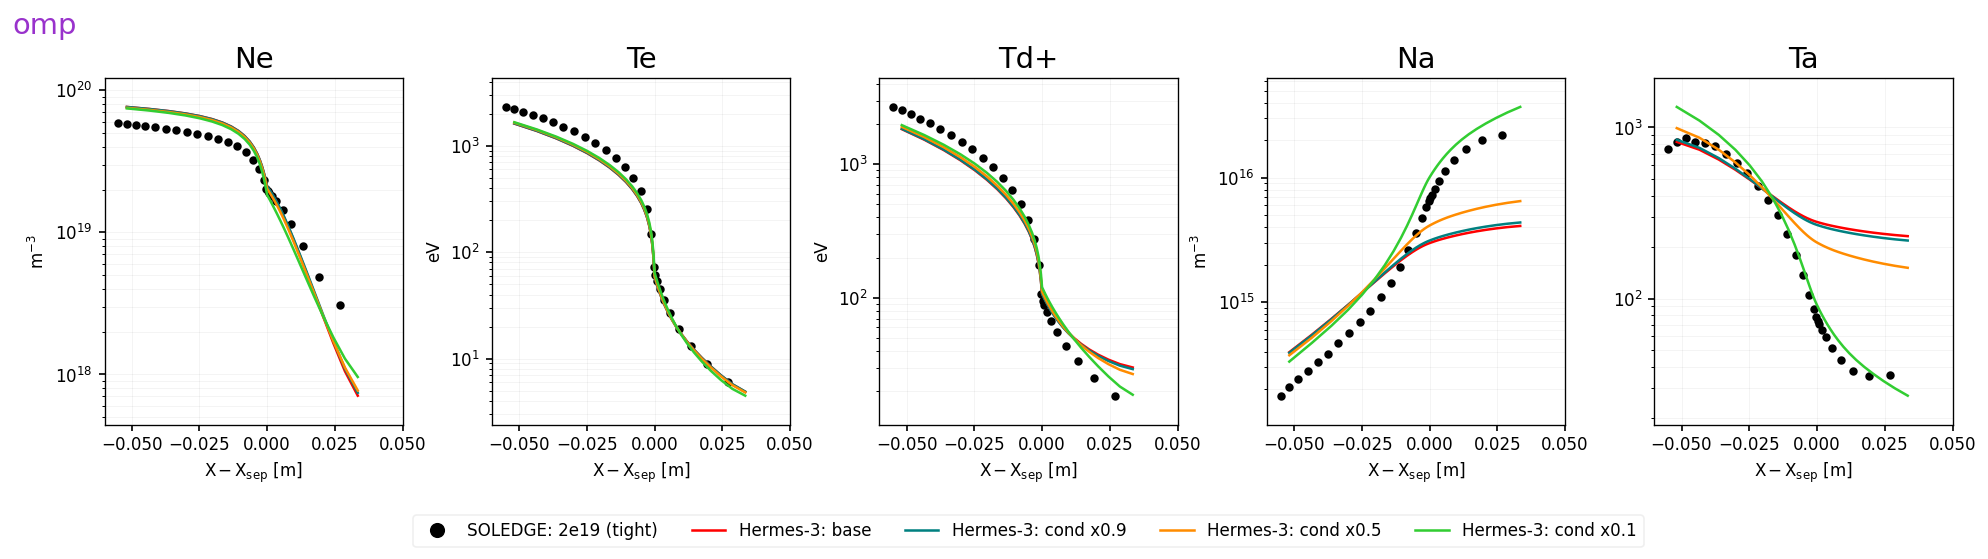

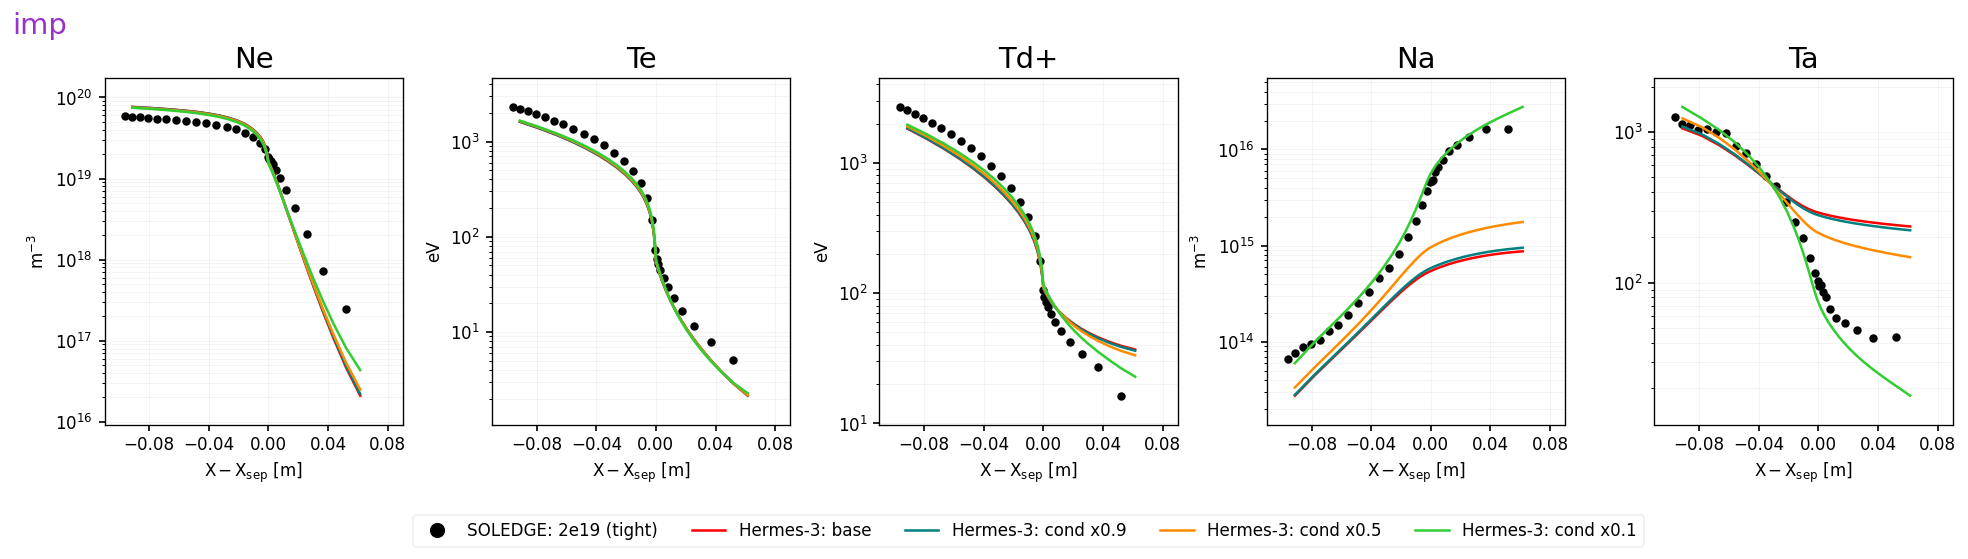

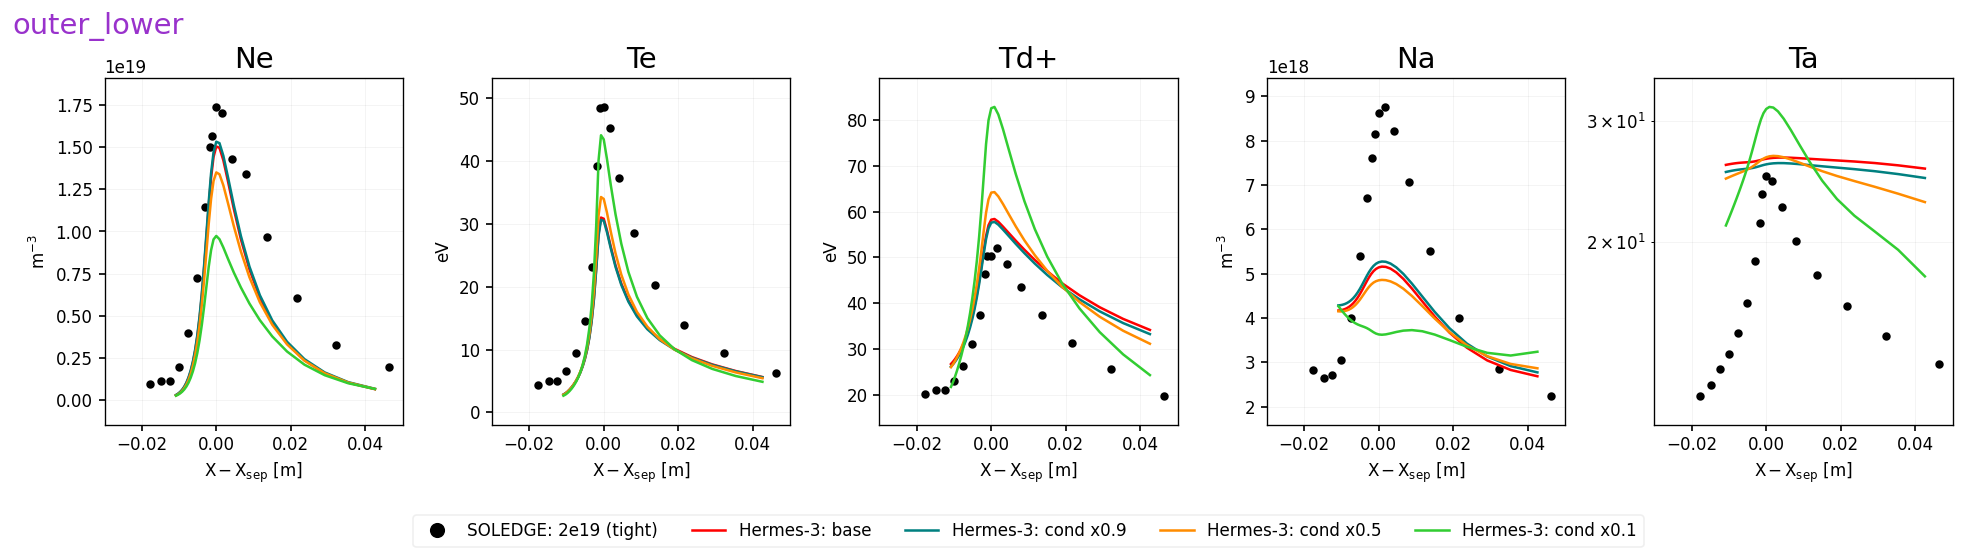

In [20]:

plt.close("all")
lineplot_compare(
    cases = { 


    "SOLEDGE: 2e19 (tight)" : dict(data=sl["tightwall_2e19"], color="black"),
    # "SOLPS: 2e19 (tight)" : dict(data=sp["nsep_3e19"], color="red"),
    
    "Hermes-3: base": dict(data=hr["base"], color = "red"),
    "Hermes-3: cond x0.9" : dict(data=hr['cond_x0.9'], color = "teal"),
    "Hermes-3: cond x0.5" : dict(data=hr['cond_x0.5'], color = "darkorange"),
    "Hermes-3: cond x0.1" : dict(data=hr['cond_x0.1'], color = "limegreen"),

    },
    regions = ["omp", "imp", "outer_lower"], 
    # regions = ["outer_lower"],
    # params = ["Ne", "Te"],
    params = ["Ne", "Te", "Td+", "Na", "Ta"],
    # params = ["Pe", "Pd+", "Pa"],
    mode = "log",
    dpi = 110,
    lw = 2
)

#  Neutral energy transport

In [24]:
for case in casestore:
    casestore[case].ds = calculate_radial_fluxes(casestore[case].ds)
    casestore[case].ds = reverse_pfr_fluxes(casestore[case].ds)

# Integrals

In [20]:
casestore.keys()

dict_keys(['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10'])

noafn
Integrating poloidally
afn_chained_mfp10
Integrating poloidally


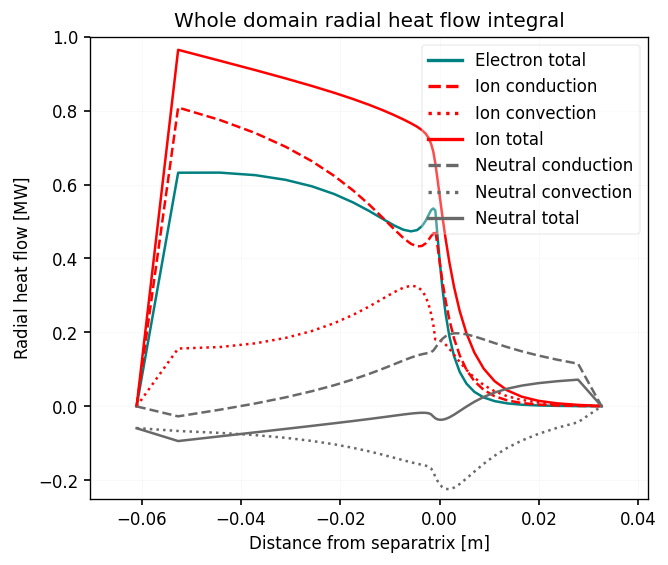

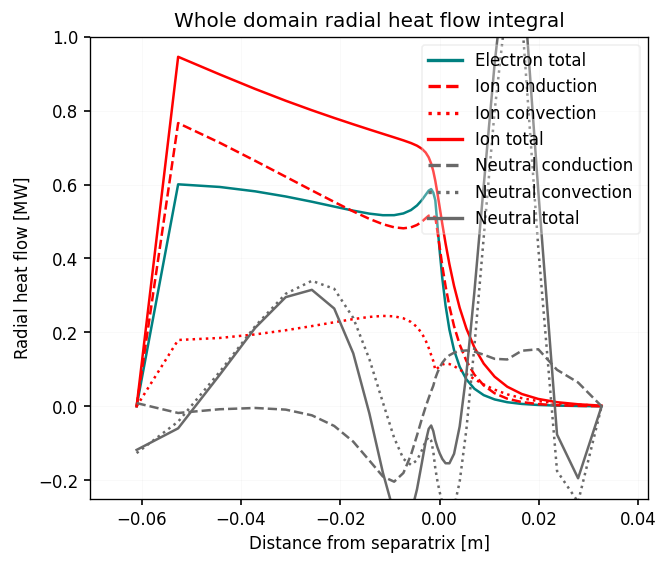

In [21]:
for case in ["noafn", "afn_chained_mfp10"]:
    print(case)
    plot_perp_heat_fluxes(casestore[case].ds.isel(t=-1), loc = "integral", ylim=(-0.25, 1.0))

## OMP

In [28]:
sp.keys()

dict_keys(['base', 'noiz_core', 'gammai_2.5', 'dpuff_1e22', 'dpuff_5e21', 'no_fast_reflec', 'nsep_2e19', 'nsep_3e19', 'narrow_core', 'no_visc', '16x_mc'])

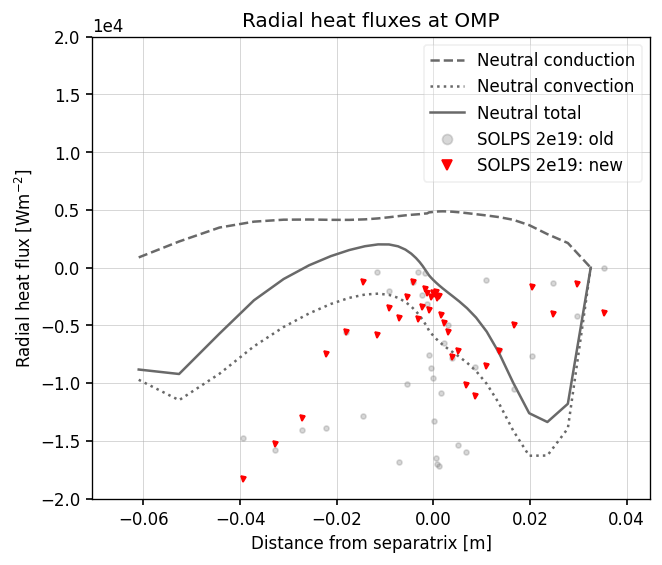

In [105]:
fig, ax = plt.subplots()
plot_perp_heat_fluxes(casestore["afn_chained_mfp10"].ds.isel(t=-1), ax = ax, loc = "omp", ylim=(-2e4, 2e4), neutrals_only = True)

ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: old", color = "grey", lw=0, marker = "o", ms = 3, alpha = 0.3)
ax.plot(sp["16x_mc"].regions["omp"].index, sp["16x_mc"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: new", color = "red", lw=0, marker = "v", ms = 3)

ax.legend()
ax.grid(alpha = 1)

noafn
afn_chained_mfp10


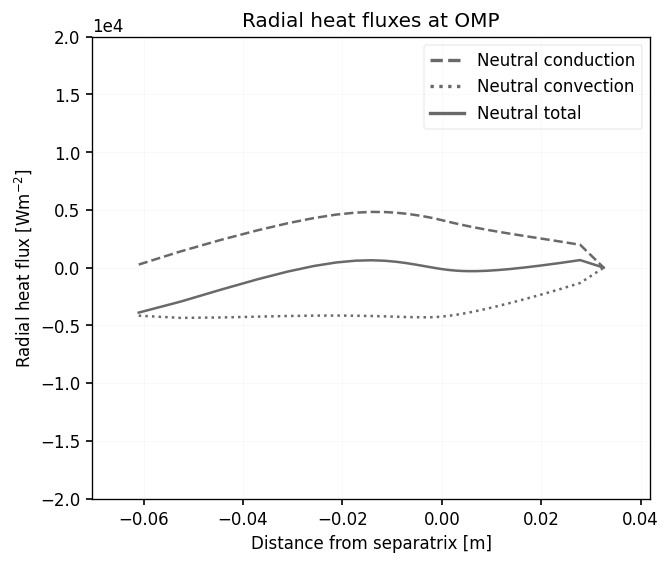

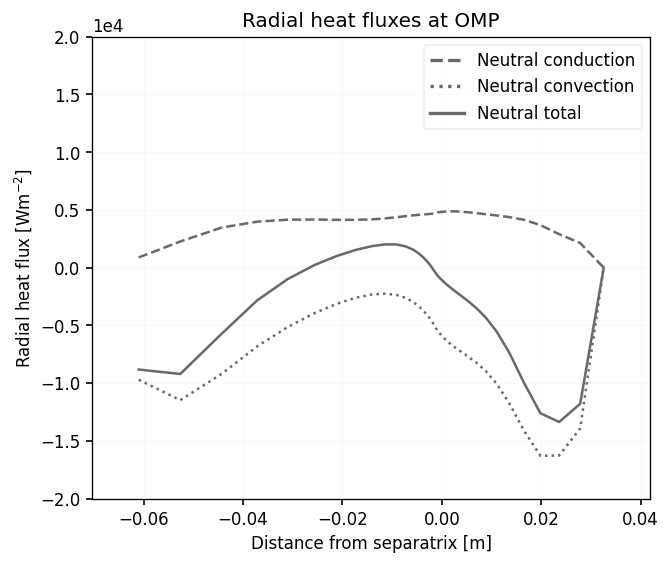

In [26]:
for case in ["noafn", "afn_chained_mfp10"]:
    print(case)
    plot_perp_heat_fluxes(casestore[case].ds.isel(t=-1), loc = "omp", ylim=(-2e4, 2e4), neutrals_only = True)

## Looking at the fluxes across domain

In [28]:
casestore.keys()

dict_keys(['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10'])

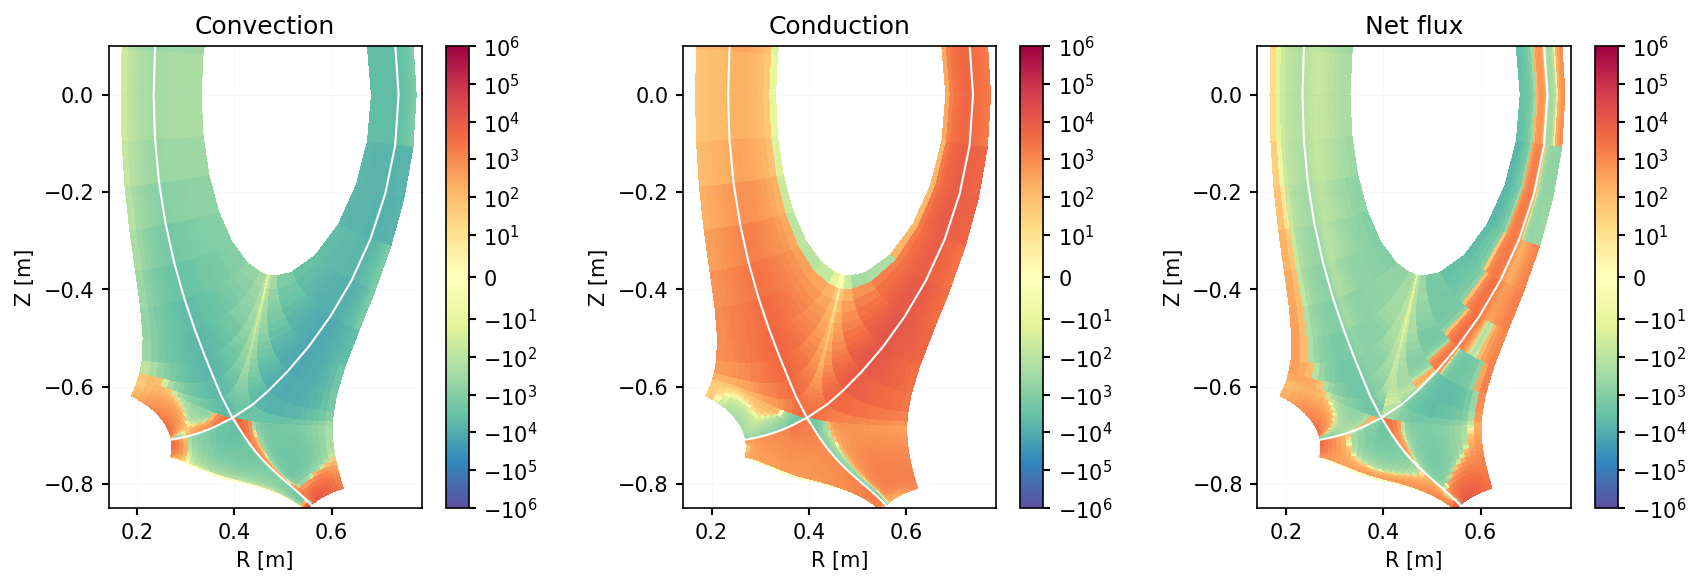

In [54]:
ds = casestore["noafn"].ds.isel(t = -1)

fig, axes = plt.subplots(1,3, figsize = (14, 4), dpi = 150)

net_flux = ds["hf_perp_conv_L_d"] + ds["hf_perp_diff_L_d"]


ds["hf_perp_conv_L_d"].hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "Spectral_r", logscale = True, vmin = -1e6, vmax = 1e6)
axes[0].set_title("Convection")

ds["hf_perp_diff_L_d"].hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", logscale = True, vmin = -1e6, vmax = 1e6)
axes[1].set_title("Conduction")

net_flux.hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "Spectral_r", logscale = True, vmin = -1e6, vmax = 1e6)
axes[2].set_title("Net flux")

for ax in axes:
    ax.set_ylim(-0.85, 0.1)

In [ ]:
# Total energy flux 

In [55]:
casestore.keys()

dict_keys(['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10'])

# Total energy flux

Text(0.5, 1.0, '')

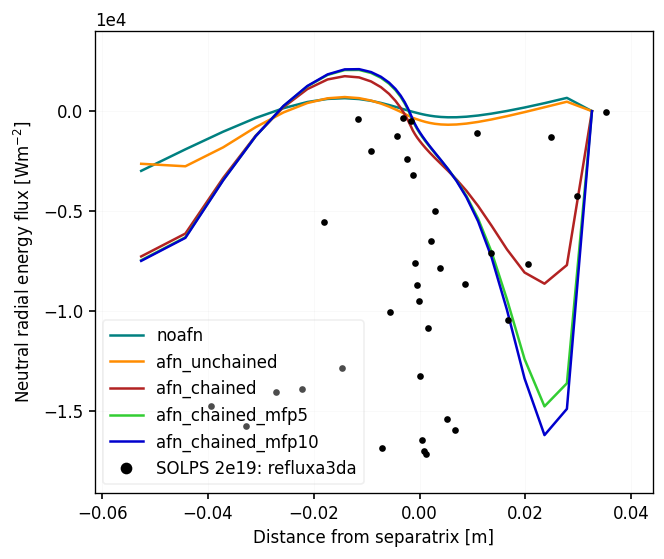

In [59]:
# ds = casestore["fixTn"].ds.isel(t=-1)
# d = ds.isel(x=slice(2,-2)).sum("theta")
# omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))

# dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
# ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 Tn=30")


fig, ax = plt.subplots()
labels = ['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10']

for i, case in enumerate(casestore):
    
    ds = casestore[case].ds.isel(t=-1)
    d = ds.isel(x=slice(2,-2)).sum("theta")
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
    ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = case)


ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: refluxa3da", color = "black", lw=0, marker = "o", ms = 3)
ax.set_ylabel("Neutral radial energy flux $[Wm^{-2}]$")
ax.set_xlabel("Distance from separatrix [m]")
ax.legend()

ax.set_title("")

# PARTICLE FLUX

In [51]:
sp.keys()

dict_keys(['base', 'noiz_core', 'gammai_2.5', 'dpuff_1e22', 'dpuff_5e21', 'no_fast_reflec', 'nsep_2e19', 'nsep_3e19', 'narrow_core', 'no_visc', '16x_mc'])

In [97]:
for case in casestore:
    casestore[case].ds = calculate_radial_fluxes(casestore[case].ds)
    casestore[case].ds = reverse_pfr_fluxes(casestore[case].ds)

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


Text(0.5, 1.0, '')

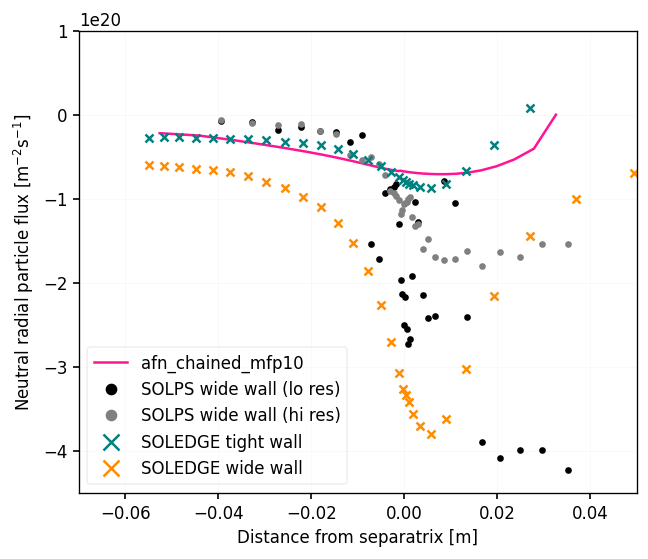

In [98]:
# ds = casestore["fixTn"].ds.isel(t=-1)
# d = ds.isel(x=slice(2,-2)).sum("theta")
# omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))

# dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
# ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 Tn=30")



fig, ax = plt.subplots()
labels = ['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10']

for i, case in enumerate(["afn_chained_mfp10"]):
    
    ds = casestore[case].ds.isel(t=-1)
    d = ds.isel(x=slice(2,-2)).sum("theta")
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
    ax.plot(dist, omp["pf_perp_diff_R_d"] / (omp["dy"]*omp["dz"]), label = case, color = "deeppink")

# ax2 = ax.twinx()
# ax2.plot(dist, omp["particle_flux_factor_d"])

# SOLPS
ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["pfluxa3da"] * -1, label = "SOLPS wide wall (lo res)", color = "black", lw=0, marker = "o", ms = 3)
ax.plot(sp["16x_mc"].regions["omp"].index, sp["16x_mc"].regions["omp"]["pfluxa3da"] * -1, label = "SOLPS wide wall (hi res)", color = "grey", lw=0, marker = "o", ms = 3)

# SOLEDGE
slc = SOLEDGEcase(path = soledgecases["tightwall_2e19"])
df = slc.get_1d_radial_data(["vxni", "Nni"])
df["NVxn"] = df["vxni"] * df["Nni"]
ax.plot(df["dist"], df["NVxn"], lw=0, marker = "x", ms = 5, markeredgewidth=1.5, label = "SOLEDGE tight wall", c = "teal")

slc = SOLEDGEcase(path = soledgecases["widewall_2e19"])
df = slc.get_1d_radial_data(["vxni", "Nni"])
df["NVxn"] = df["vxni"] * df["Nni"]
ax.plot(df["dist"], df["NVxn"], lw=0, marker = "x", ms = 5, markeredgewidth=1.5, label = "SOLEDGE wide wall", c = "darkorange")

ax.set_ylabel("Neutral radial particle flux $[m^{-2}s^{-1}]$")
ax.set_xlabel("Distance from separatrix [m]")
ax.legend()
ax.set_xlim(-0.07, 0.05)
ax.set_ylim(-4.5e20, 1e20)
ax.set_title("")

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


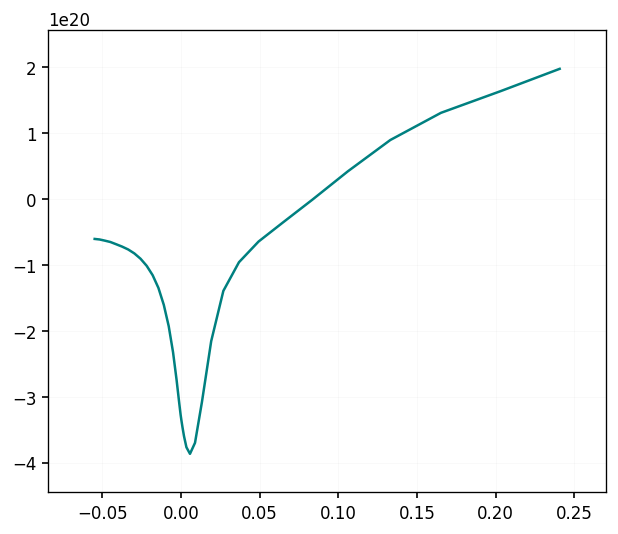

In [68]:
slc = SOLEDGEcase(path = soledgecases["tightwall_2e19_5m"])

df = slc.get_1d_radial_data(["vxni", "Nni"])

df["NVxn"] = df["vxni"] * df["Nni"]

plt.plot(df["dist"], df["NVxn"]) 


In [61]:
slc.params

['Dense',
 'Tempe',
 'velocitye',
 'Me',
 'IRade',
 '(Dens*Temp^1.5)e',
 'pi_parallele',
 'Alphame',
 'Alphape',
 'Sne',
 'SGe',
 'SEe',
 'count_Zhdanov_min_ne',
 'count_clean_min_ne',
 'count_clean_min_te',
 'count_coupling_min_te',
 'IRad1e',
 'Zeff',
 'SE1e',
 'TotRad',
 'TotNRad',
 'Densi',
 'Tempi',
 'velocityi',
 'Mi',
 'IRadi',
 '(Dens*Temp^1.5)i',
 'pi_paralleli',
 'Alphami',
 'Alphapi',
 'Sni',
 'SGi',
 'SEi',
 'count_Zhdanov_min_ni',
 'count_clean_min_ni',
 'count_clean_min_ti',
 'count_coupling_min_ti',
 'IRad1i',
 'NRadi',
 'Nni',
 'Tni',
 'Pni',
 'vxni',
 'vyni',
 'vzni',
 'Nmi',
 'Tmi',
 'vxmi',
 'vymi',
 'vzmi',
 'Ntii',
 'Ppi',
 'Epi',
 'TDensi',
 'TDensei',
 'FracDensi',
 'Cimpi',
 'FraceDensi',
 'Zavei',
 'TotRadi']

In [59]:
sl["tightwall_2e19"].regions["omp"].columns

Index(['D', 'Nu', 'Chie', 'Chi', 'Vpinch', 'Ne', 'Te', '(Dens*Temp^1.5)e',
       'Pd+', 'Nd+', 'Td+', '(Dens*Temp^1.5)i', 'Mi', 'Vd+', 'Rd+_ex', 'Pe',
       'Na', 'Nm', 'Pa', 'Ta', 'Tm', 'Vyd', 'Pm'],
      dtype='object')

In [58]:

Gnx = sl["tightwall_2e19"].regions["omp"][""]

,D,Nu,Chie,Chi,Vpinch,Ne,Te,(Dens*Temp^1.5)e,Pd+,Nd+,...,Vd+,Rd+_ex,Pe,Na,Nm,Pa,Ta,Tm,Vyd,Pm
pos,,,,,,,,,,,,,,,,,,,,,
-0.054912,0.3,0.2,0.45,0.45,0.0,5.860047e+19,2311.718400,6.513336e+24,25223.411457,5.860047e+19,...,-0.000463,0.0,21704.330637,1.764993e+14,0.000000e+00,0.021201,749.743040,0.000000,-125259.7500,0.000000e+00
-0.051773,0.3,0.2,0.45,0.45,0.0,5.776292e+19,2195.611600,5.942681e+24,23421.672508,5.776292e+19,...,-0.000456,0.0,20319.594922,2.084760e+14,0.000000e+00,0.027471,822.460090,0.000000,-109288.8300,0.000000e+00
-0.048441,0.3,0.2,0.45,0.45,0.0,5.685758e+19,2071.393200,5.360215e+24,21558.392929,5.685758e+19,...,-0.000462,0.0,18869.539413,2.417737e+14,0.000000e+00,0.033680,869.466790,0.000000,-94685.6420,0.000000e+00
-0.044931,0.3,0.2,0.45,0.45,0.0,5.588322e+19,1940.145100,4.775653e+24,19658.643682,5.588322e+19,...,-0.000479,0.0,17371.049369,2.791952e+14,0.000000e+00,0.036918,825.313370,0.000000,-81367.8130,0.000000e+00
-0.041269,0.3,0.2,0.45,0.45,0.0,5.483065e+19,1802.593700,4.196336e+24,17739.703671,5.483065e+19,...,-0.000504,0.0,15835.495779,3.276670e+14,0.000000e+00,0.042491,809.376770,0.000000,-61330.5660,0.000000e+00
-0.037485,0.3,0.2,0.45,0.45,0.0,5.368751e+19,1659.706200,3.630113e+24,15820.656004,5.368751e+19,...,-0.000531,0.0,14276.273793,3.852262e+14,0.000000e+00,0.048070,778.832270,0.000000,-56962.3550,0.000000e+00
-0.033612,0.3,0.2,0.45,0.45,0.0,5.243676e+19,1512.765000,3.085269e+24,13923.017149,5.243676e+19,...,-0.000569,0.0,12709.185409,4.647358e+14,0.000000e+00,0.052246,701.681810,0.000000,-48412.1930,0.000000e+00
-0.029687,0.3,0.2,0.45,0.45,0.0,5.105254e+19,1363.063400,2.569162e+24,12066.523536,5.105254e+19,...,-0.000613,0.0,11149.203522,5.616999e+14,0.000000e+00,0.055461,616.271740,0.000000,-41659.7170,0.000000e+00
-0.025750,0.3,0.2,0.45,0.45,0.0,4.949804e+19,1211.950300,2.088407e+24,10270.189857,4.949804e+19,...,-0.000660,0.0,9611.323282,6.872538e+14,0.000000e+00,0.059376,539.245400,0.000000,-38881.7800,0.000000e+00


# Convective energy flux

Text(0.5, 1.0, '')

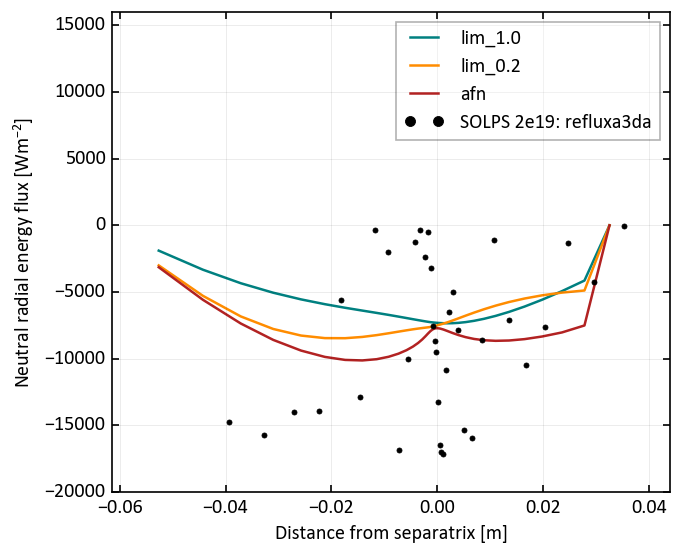

In [52]:
# ds = casestore["fixTn"].ds.isel(t=-1)
# d = ds.isel(x=slice(2,-2)).sum("theta")
# omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))

# dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
# ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 Tn=30")


fig, ax = plt.subplots()
labels = ["lim_1.0", "lim_0.2", "afn"]

for i, case in enumerate(["lim_1.0", "lim_0.2", "isolim"]):
    
    ds = casestore[case].ds.isel(t=-1)
    d = ds.isel(x=slice(2,-2)).sum("theta")
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
    ax.plot(dist, omp["hf_perp_conv_R_d"] / (omp["dy"]*omp["dz"]), label = labels[i], ls = "-")


ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["refluxa3da"]*-1, label = "SOLPS 2e19: refluxa3da", color = "black", lw=0, marker = "o", ms = 3,ls = "--")
ax.set_ylabel("Neutral radial energy flux $[Wm^{-2}]$")
ax.set_xlabel("Distance from separatrix [m]")
ax.legend()
ax.set_ylim(-2e4, 16e3)
ax.set_title("")

Text(0.5, 1.0, 'AFN Limiter factors at OMP')

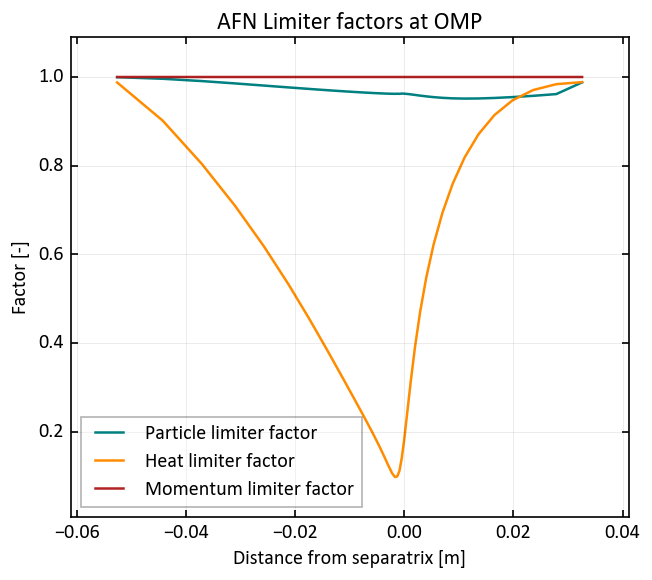

In [57]:
fig, ax = plt.subplots()

ds = casestore["isolim"].ds.isel(t=-1)
omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])

ax.plot(dist, omp["particle_flux_factor_d"], label = "Particle limiter factor")
ax.plot(dist, omp["heat_flux_factor_d"], label = "Heat limiter factor")
ax.plot(dist, omp["momentum_flux_factor_d"], label = "Momentum limiter factor")

ax.legend()
ax.set_xlabel("Distance from separatrix [m]")
ax.set_ylabel("Factor [-]")
ax.set_title("AFN Limiter factors at OMP")


Text(0.5, 1.0, '')

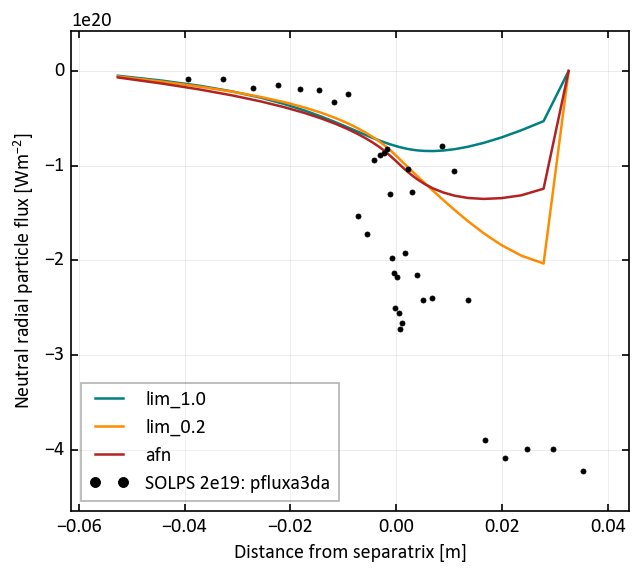

In [40]:
# ds = casestore["fixTn"].ds.isel(t=-1)
# d = ds.isel(x=slice(2,-2)).sum("theta")
# omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))

# dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
# ax.plot(dist, omp["hf_perp_tot_R_d"] / (omp["dy"]*omp["dz"]), label = "Hermes-3 Tn=30")


fig, ax = plt.subplots()
labels = ["lim_1.0", "lim_0.2", "afn"]

for i, case in enumerate(["lim_1.0", "lim_0.2", "isolim"]):
    
    ds = casestore[case].ds.isel(t=-1)
    d = ds.isel(x=slice(2,-2)).sum("theta")
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
    ax.plot(dist, omp["pf_perp_diff_R_d"] / (omp["dy"]*omp["dz"]), label = labels[i])


ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["pfluxa3da"] * -1, label = "SOLPS 2e19: pfluxa3da", color = "black", lw=0, marker = "o", ms = 3,ls = "--")
ax.set_ylabel("Neutral radial particle flux $[Wm^{-2}]$")
ax.set_xlabel("Distance from separatrix [m]")
ax.legend()

ax.set_title("")